In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

19
(720L, 1280L, 3L)


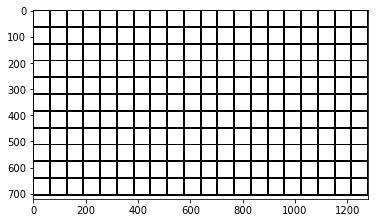

In [72]:
image = np.ones((720, 1280, 3))

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
        
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    
    # Compute the number of windows in x/y
    #calculate buffer to end
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    print(nx_windows)
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)
    
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6) 
print(image.shape)

plt.imshow(window_img, cmap="gray")
plt.show()

In [37]:
x = [(0, 0), (128, 128), (256, 256), (384, 384), (512, 512), (640, 640), (768, 768), (896, 896), (1024, 1024), (1152, 1152)]
y=  [(0, 0), (128, 128), (256, 256), (384, 384), (512, 512), (640, 640)]

In [23]:
windows

[((0, 0), (0, 0)),
 ((128, 128), (128, 128)),
 ((256, 256), (256, 256)),
 ((384, 384), (384, 384)),
 ((512, 512), (512, 512)),
 ((640, 640), (640, 640))]

In [34]:
x.append(x)

In [35]:
x

[(0, 0),
 (128, 128),
 (256, 256),
 (384, 384),
 (512, 512),
 (640, 640),
 (768, 768),
 (896, 896),
 (1024, 1024),
 (1152, 1152),
 [...]]

In [62]:
a = np.array([[1,2,3]])
a.reshape(1, -1)


array([[1, 2, 3]])

In [57]:
np.expand_dims(a, 0)

array([[1, 2, 3]])

In [63]:
a.shape

(1L, 3L)

In [66]:
a.repeat(, 0)

SyntaxError: invalid syntax (<ipython-input-66-5a3a303276d2>, line 1)

In [ ]:
startx = 